In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [59]:
import cactas as C

In [43]:
import tensorflow as tf
#gpu_available = tf.test.is_gpu_available()
#gpu_available

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'
CAPATH='/raid/mpsych/CACTAS/DATA/CA24'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
masks = C.Helper.load_seg_data(CAPATH)

In [7]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.split_patients_masks(images, labels, masks)

In [8]:
X_train, y_train, m_train, X_test, y_test, m_test = C.Helper.normalization2(DATAPATH, CAPATH, X_train, y_train, m_train, X_test, y_test, m_test)

In [9]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key_fulldata(y_train)

In [10]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13456, 512, 512, 1) (13456, 512, 512, 1) (3310, 512, 512, 1) (3310, 512, 512, 1)


In [11]:
m_train, m_test = C.Helper.extract_masks_slices(m_train, m_test)

(13456, 512, 512, 1) (3310, 512, 512, 1)


In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
m_train = m_train.astype(np.float32)
m_test = m_test.astype(np.float32)

In [13]:
train_images_array, test_images_array = C.Helper.masked_image(X_train, m_train, X_test, m_test)

(13456, 512, 512, 1) (3310, 512, 512, 1)


In [14]:
X_train_set = train_images_array[:last_key]
y_train_set = y_train[:last_key]
X_val = train_images_array[last_key:]
y_val = y_train[last_key:]

In [44]:
model = C.Helper.create_unet(X_train_set[0].shape)

In [18]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2024-05-28 03:17:01.987011: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-05-28 03:17:02.006829: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245740000 Hz


Epoch 1/200


2024-05-28 03:17:03.647518: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-28 03:17:04.266932: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2024-05-28 03:17:04.943564: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2024-05-28 03:17:04.943586: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2024-05-28 03:17:04.943654: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-05-28 03:17:05.024429: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-28 03:17:05.745671: I tensorflow/stream_exec

665/665 [==============================] - 316s 457ms/step - loss: 0.0867 - iou: 4.0888e-05 - iou_thresholded: 0.3446 - val_loss: 0.0031 - val_iou: 1.3337e-04 - val_iou_thresholded: 0.8953
Epoch 2/200
665/665 [==============================] - 305s 451ms/step - loss: 0.0015 - iou: 2.5502e-04 - iou_thresholded: 0.4911 - val_loss: 7.6196e-04 - val_iou: 4.9732e-04 - val_iou_thresholded: 0.8356
Epoch 3/200
665/665 [==============================] - 300s 451ms/step - loss: 5.1530e-04 - iou: 9.0135e-04 - iou_thresholded: 0.4512 - val_loss: 3.3902e-04 - val_iou: 8.4788e-04 - val_iou_thresholded: 0.8989
Epoch 4/200
665/665 [==============================] - 300s 451ms/step - loss: 2.7151e-04 - iou: 0.0018 - iou_thresholded: 0.4336 - val_loss: 1.9342e-04 - val_iou: 0.0016 - val_iou_thresholded: 0.9021
Epoch 5/200
665/665 [==============================] - 300s 451ms/step - loss: 1.6646e-04 - iou: 0.0034 - iou_thresholded: 0.4150 - val_loss: 1.3148e-04 - val_iou: 0.0027 - val_iou_thresholded: 0.

665/665 [==============================] - 300s 451ms/step - loss: 7.7211e-06 - iou: 0.4580 - iou_thresholded: 0.7641 - val_loss: 3.3543e-05 - val_iou: 0.5820 - val_iou_thresholded: 0.9019
Epoch 42/200
665/665 [==============================] - 300s 451ms/step - loss: 7.8760e-06 - iou: 0.4703 - iou_thresholded: 0.7760 - val_loss: 4.6005e-05 - val_iou: 0.5941 - val_iou_thresholded: 0.8771
Epoch 43/200
665/665 [==============================] - 300s 451ms/step - loss: 6.9602e-06 - iou: 0.4885 - iou_thresholded: 0.7697 - val_loss: 4.2895e-05 - val_iou: 0.6274 - val_iou_thresholded: 0.8770
Epoch 44/200
665/665 [==============================] - 300s 451ms/step - loss: 6.8569e-06 - iou: 0.5133 - iou_thresholded: 0.7968 - val_loss: 4.5023e-05 - val_iou: 0.6458 - val_iou_thresholded: 0.8811
Epoch 45/200
665/665 [==============================] - 300s 451ms/step - loss: 8.7586e-06 - iou: 0.4626 - iou_thresholded: 0.7497 - val_loss: 3.3285e-05 - val_iou: 0.6391 - val_iou_thresholded: 0.8998
Epo

Epoch 82/200
665/665 [==============================] - 300s 451ms/step - loss: 3.5756e-06 - iou: 0.7037 - iou_thresholded: 0.8572 - val_loss: 5.3775e-05 - val_iou: 0.7912 - val_iou_thresholded: 0.9024
Epoch 83/200
665/665 [==============================] - 300s 450ms/step - loss: 4.0950e-06 - iou: 0.7152 - iou_thresholded: 0.8735 - val_loss: 6.2692e-05 - val_iou: 0.7499 - val_iou_thresholded: 0.8625
Epoch 84/200
665/665 [==============================] - 300s 451ms/step - loss: 4.5804e-06 - iou: 0.7037 - iou_thresholded: 0.8587 - val_loss: 5.4347e-05 - val_iou: 0.7192 - val_iou_thresholded: 0.8553
Epoch 85/200
665/665 [==============================] - 300s 451ms/step - loss: 3.5658e-06 - iou: 0.7161 - iou_thresholded: 0.8777 - val_loss: 5.7838e-05 - val_iou: 0.7323 - val_iou_thresholded: 0.8695
Epoch 86/200
665/665 [==============================] - 300s 451ms/step - loss: 3.6700e-06 - iou: 0.7272 - iou_thresholded: 0.8672 - val_loss: 5.1578e-05 - val_iou: 0.7774 - val_iou_thresholde

665/665 [==============================] - 299s 450ms/step - loss: 1.8099e-06 - iou: 0.8866 - iou_thresholded: 0.9471 - val_loss: 9.1928e-05 - val_iou: 0.7629 - val_iou_thresholded: 0.8681
Epoch 123/200
665/665 [==============================] - 299s 450ms/step - loss: 1.6668e-06 - iou: 0.8701 - iou_thresholded: 0.9497 - val_loss: 9.1593e-05 - val_iou: 0.7953 - val_iou_thresholded: 0.8551
Epoch 124/200
665/665 [==============================] - 299s 450ms/step - loss: 1.4083e-06 - iou: 0.8895 - iou_thresholded: 0.9531 - val_loss: 8.5896e-05 - val_iou: 0.7846 - val_iou_thresholded: 0.8577
Epoch 125/200
665/665 [==============================] - 299s 450ms/step - loss: 1.8027e-06 - iou: 0.8657 - iou_thresholded: 0.9446 - val_loss: 8.7966e-05 - val_iou: 0.7661 - val_iou_thresholded: 0.8390
Epoch 126/200
665/665 [==============================] - 299s 450ms/step - loss: 1.8246e-06 - iou: 0.8657 - iou_thresholded: 0.9572 - val_loss: 9.8881e-05 - val_iou: 0.7884 - val_iou_thresholded: 0.8434

665/665 [==============================] - 299s 450ms/step - loss: 1.0534e-06 - iou: 0.9190 - iou_thresholded: 0.9757 - val_loss: 1.1685e-04 - val_iou: 0.7200 - val_iou_thresholded: 0.8631
Epoch 163/200
665/665 [==============================] - 299s 450ms/step - loss: 7.6514e-07 - iou: 0.9155 - iou_thresholded: 0.9832 - val_loss: 1.2128e-04 - val_iou: 0.7413 - val_iou_thresholded: 0.8605
Epoch 164/200
665/665 [==============================] - 299s 450ms/step - loss: 5.1239e-07 - iou: 0.9458 - iou_thresholded: 0.9846 - val_loss: 1.2502e-04 - val_iou: 0.8123 - val_iou_thresholded: 0.8540
Epoch 165/200
665/665 [==============================] - 299s 450ms/step - loss: 9.7510e-07 - iou: 0.9128 - iou_thresholded: 0.9846 - val_loss: 1.2551e-04 - val_iou: 0.7902 - val_iou_thresholded: 0.8276
Epoch 166/200
665/665 [==============================] - 299s 450ms/step - loss: 7.2133e-07 - iou: 0.9290 - iou_thresholded: 0.9854 - val_loss: 1.2260e-04 - val_iou: 0.8014 - val_iou_thresholded: 0.8511

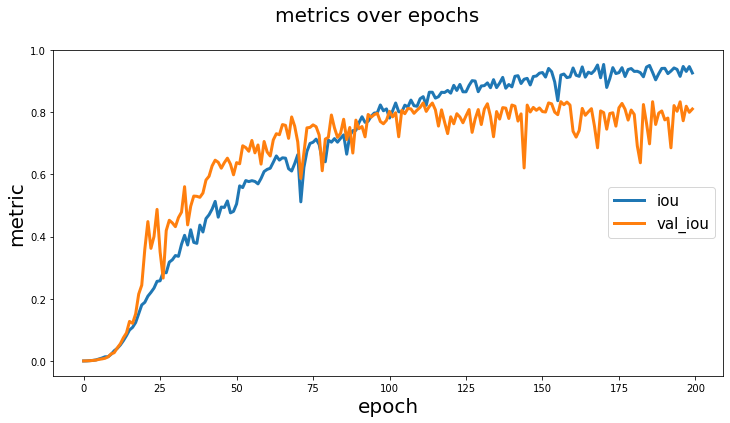

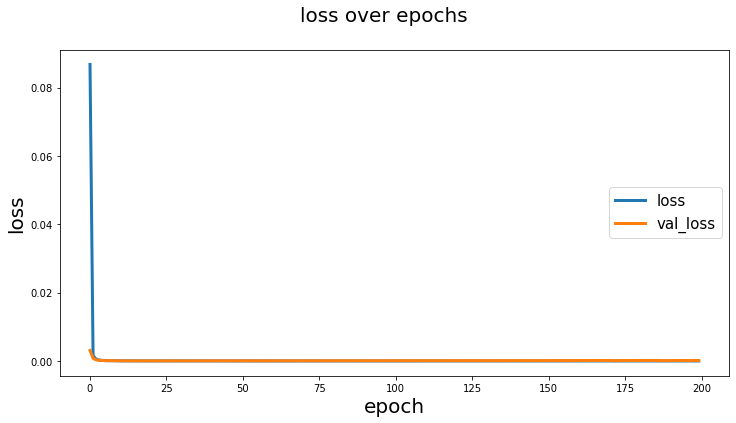

In [19]:
C.Helper.visualize_graph(history)

In [20]:
y_pred = C.Helper.prediction(test_images_array, model)

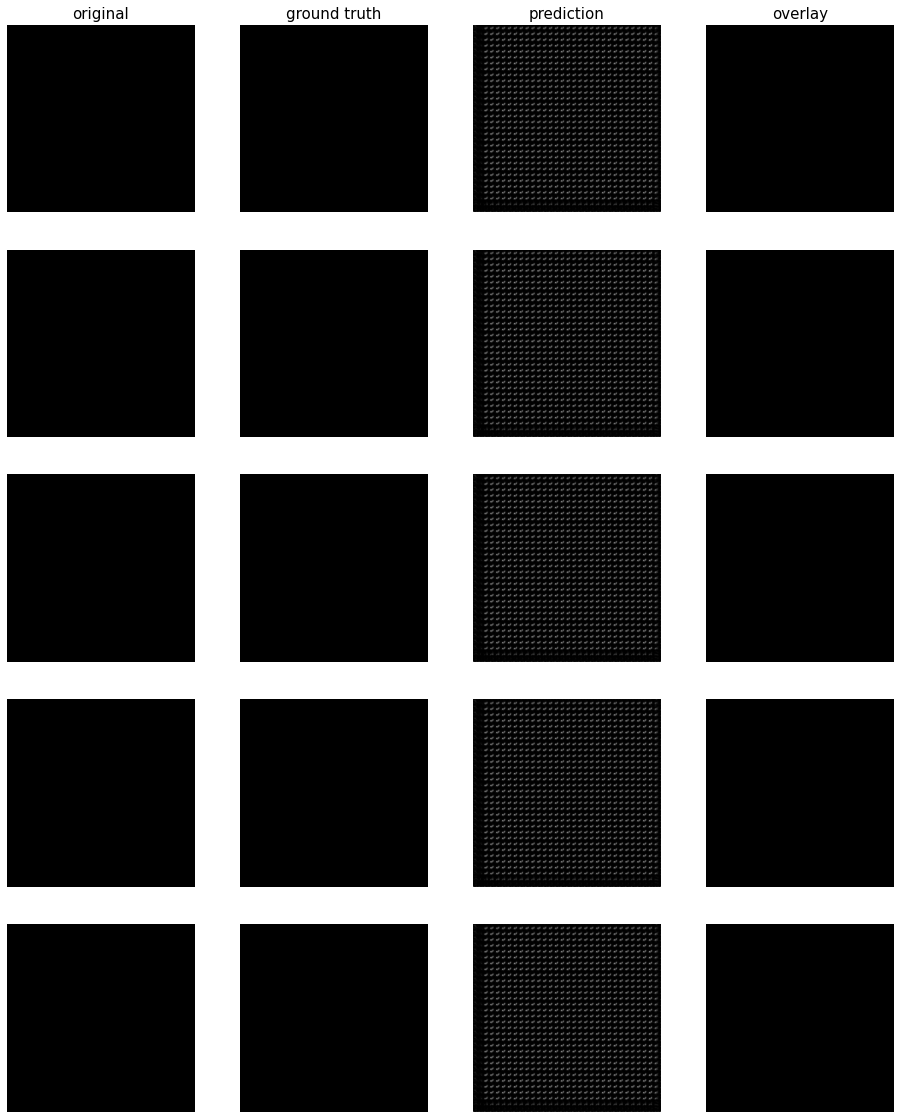

In [21]:
C.Helper.visualize_result(test_images_array, y_test, y_pred)

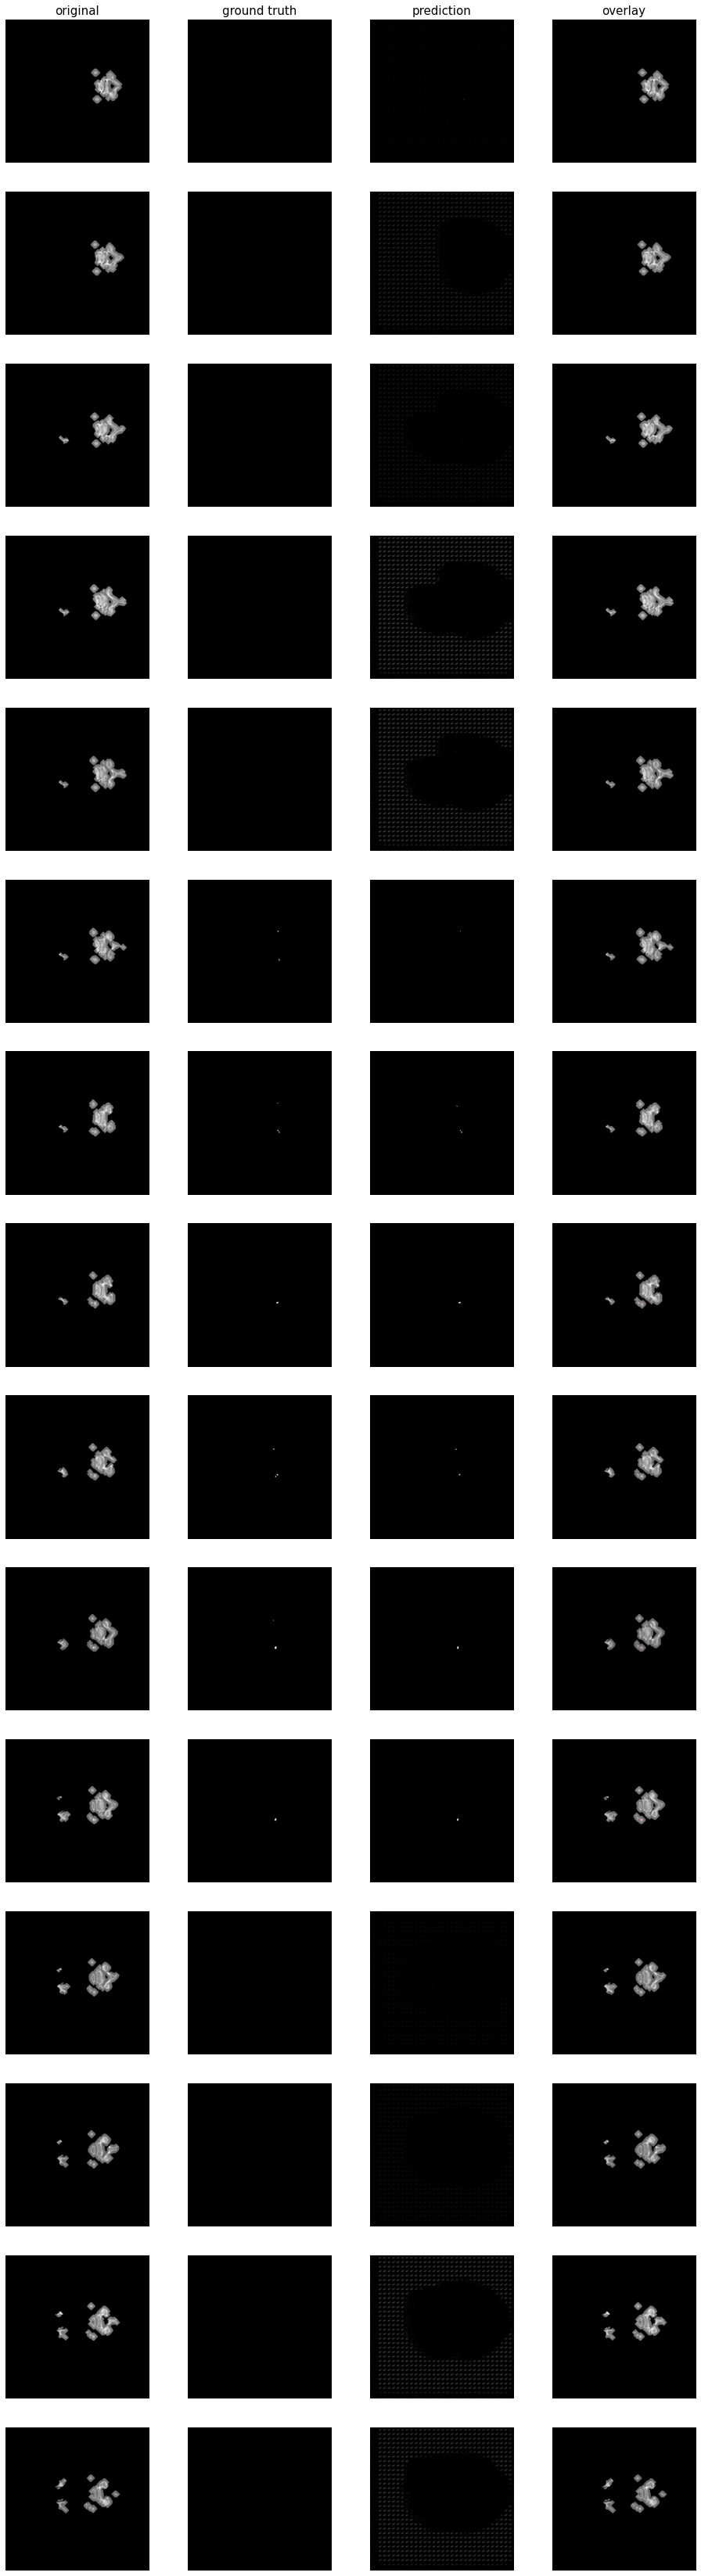

In [60]:
C.Helper.visualize_result_limit(test_images_array, y_test, y_pred, start_index=75, end_index=90)

In [22]:
C.Helper.evaluate(test_images_array, y_test, model)

104/104 [==============================] - 26s 250ms/step - loss: 1.7934e-04 - iou: 0.7034 - iou_thresholded: 0.7779


In [34]:
import pickle

In [35]:
with open('predictions_unet_v22.pkl', 'wb') as f:
    pickle.dump(y_pred, f)

In [41]:
a = y_pred
a_binary = np.zeros(a.shape, dtype=np.bool_)
a_binary[a > 0.5] = True

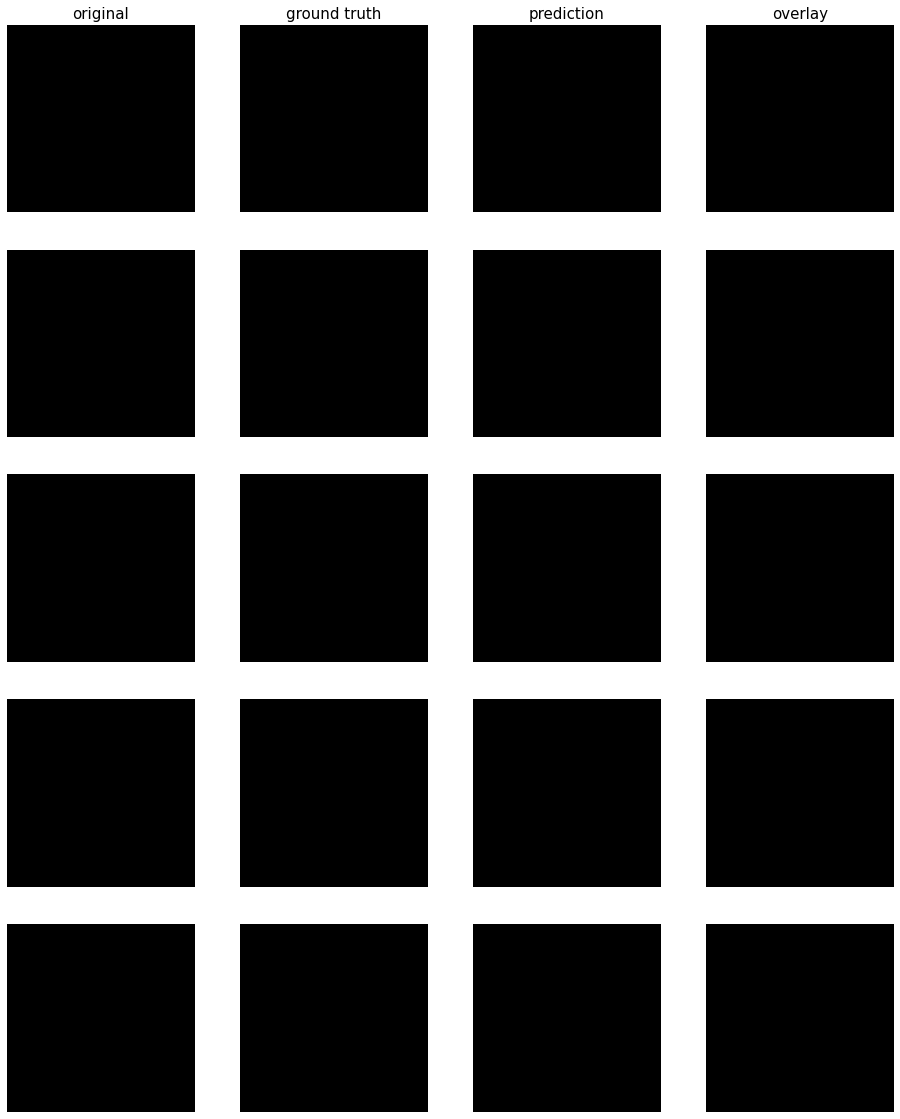

In [37]:
C.Helper.visualize_result(test_images_array, y_test, a_binary)

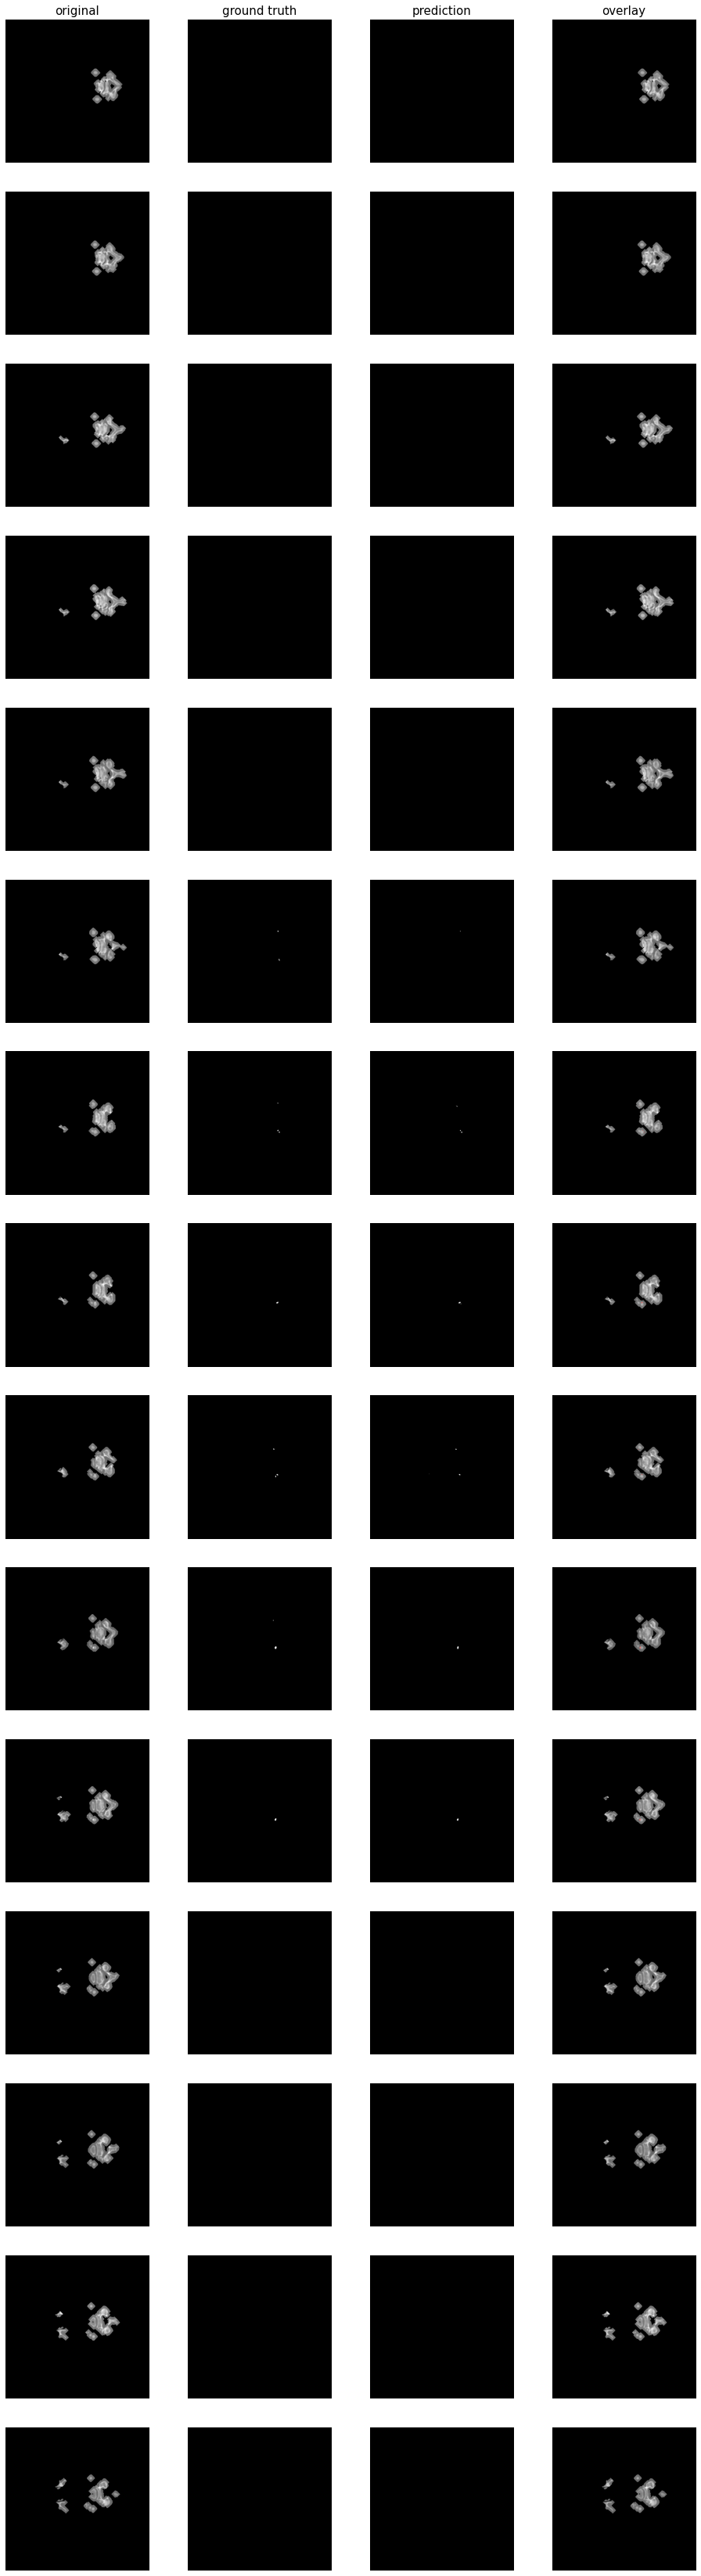

In [61]:
C.Helper.visualize_result_limit(test_images_array, y_test, a_binary, start_index=75, end_index=90)

In [39]:
C.Helper.evaluate(test_images_array, a_binary, model)

104/104 [==============================] - 26s 252ms/step - loss: 6.5408e-07 - iou: 0.8870 - iou_thresholded: 1.0000
